# Data transfer rates for the SLAC -> NERSC transfers

Transfer statistics for the SLAC -> NERSC tranfers. The files are copied with XRootD.
xrdcp with third-party-copy (TPC) is initiating a transfer. Ths actual transfer is done by 
xrdcp that runs on the NERSC dtn XRootD server (data is pulled).

A file is transferred and written to the file system at NERSC (gpfs). After the transfer finished
the file is read from disk (some dat might be in cache) and checksummed. The elapsed time (stop - start)
contains both the time for the transfer and for the checksumming. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [9]:
#fn = "/home/wilko/data/nersc_trans.20180621T001600.csv"
fn = "/reg/neh/home/wilko/data/ana/xswap/nersc_trans.20180621T001600.csv"
d = pd.read_csv(fn)
d.rate /= pow(2,20)
d.fsize /= pow(2,30)
d['elap'] = d.stopt - d.startt
#d.head()

# Rates and file sizes

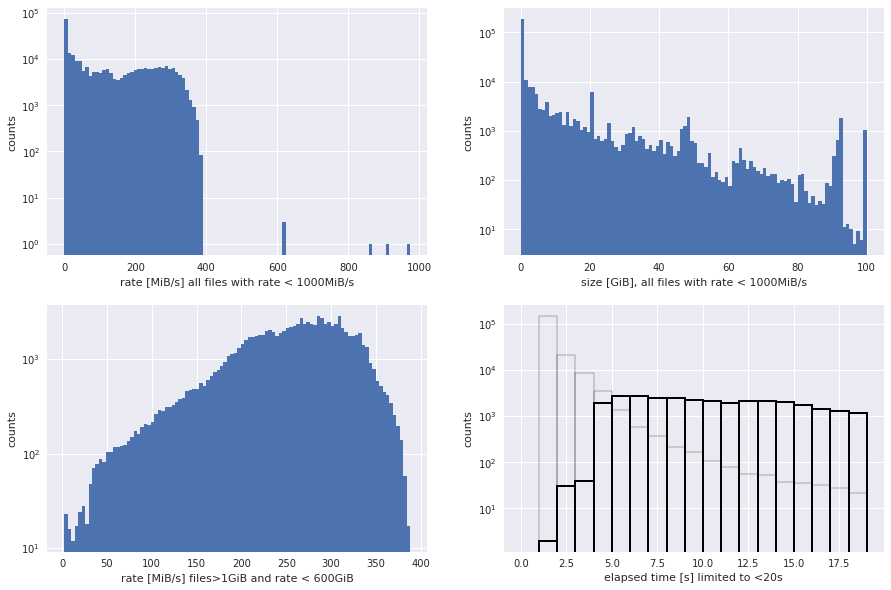

In [10]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2,2,1)
d.loc[ d.rate < 1000 ].rate.hist(bins=100)
plt.xlabel("rate [MiB/s] all files with rate < 1000MiB/s")
plt.ylabel("counts")
ax.set_yscale("log")

ax = fig.add_subplot(2,2,2)
d.loc[ d.rate < 1000 ].fsize.hist(bins=100)
plt.xlabel("size [GiB], all files with rate < 1000MiB/s")
plt.ylabel("counts")
ax.set_yscale("log")

ax = fig.add_subplot(2,2,3)
d.loc[ (d.rate < 600) & (d.fsize > 1.0) ].rate.hist(bins=100)
plt.xlabel("rate [MiB/s] files>1GiB and rate < 600GiB")
plt.ylabel("counts")
ax.set_yscale("log")

ax = fig.add_subplot(2,2,4)
d.loc[ (d.elap < 20) & (d.fsize > 1) ].elap.hist(bins=range(0,20), fill=False, linewidth=2)
d.loc[ (d.elap < 20) & (d.fsize < 1) ].elap.hist(bins=range(0,20), fill=False, color='b')
plt.xlabel("elapsed time [s] limited to <20s")
plt.ylabel("counts")
ax.set_yscale("log")


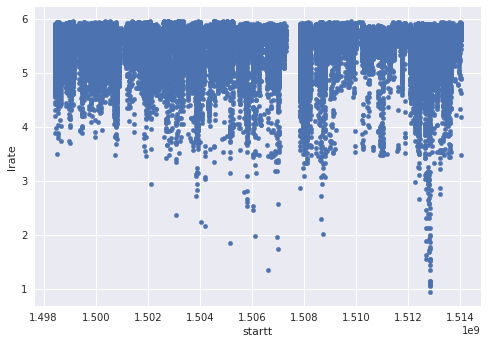

In [11]:
d['lrate'] = np.log(d.loc[ d.fsize > 1.0 ].rate)
d.loc[ (d.fsize>1.0) & (d.rate < 600) ].plot(kind='scatter', x='startt', y='lrate')